In [19]:
# reference from https://www.geeksforgeeks.org/amazon-product-reviews-sentiment-analysis-in-python/
#dataset obtained from https://drive.google.com/file/d/1yXhMGfaElSHpjz5CXa9UxAtV7A7i14hl/view
pip install wordcloud


     |████████████████████████████████| 160 kB 2.4 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [27]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/suryahankar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/suryahankar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
data = pd.read_csv('/Users/suryahankar/Desktop/DATA SCIENCE PROJECT/SENTINENT ANALYSIS FOR AMAZON REVIEWS USING NLTK TOOLKIT/AmazonReview.csv')
data.head()



,Review,Sentiment
0,Fast shipping but this product is very cheaply...,1
1,This case takes so long to ship and it's not e...,1
2,Good for not droids. Not good for iPhones. You...,1
3,The cable was not compatible between my macboo...,1
4,The case is nice but did not have a glow light...,1


In [6]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     24999 non-null  object
 1   Sentiment  25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [7]:
#dropping null values
data.dropna(inplace=True)



In [8]:
#1,2,3->negative(i.e 0)
data.loc[data['Sentiment']<=3,'Sentiment'] = 0

#4,5->positive(i.e 1)
data.loc[data['Sentiment']>3,'Sentiment'] = 1



In [12]:
#Now, once the dataset is ready, we will clean the review column by removing the stopwords. The code for that is given below.
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
 
data['Review']=data['Review'].apply(clean_review)



In [13]:
#after compliting the preprocess checking the dataset
data.head()



,Review,Sentiment
0,Fast shipping product cheaply made I brought g...,0
1,This case takes long ship even worth DONT BUY!!!!,0
2,Good droids. Not good iPhones. You cannot use ...,0
3,The cable compatible macbook iphone. Also conn...,0
4,The case nice glow light. I'm disappointed pro...,0


In [14]:
#check out that how many counts are there for positive and negative sentiments
data['Sentiment'].value_counts()



0    15000
1     9999
Name: Sentiment, dtype: int64

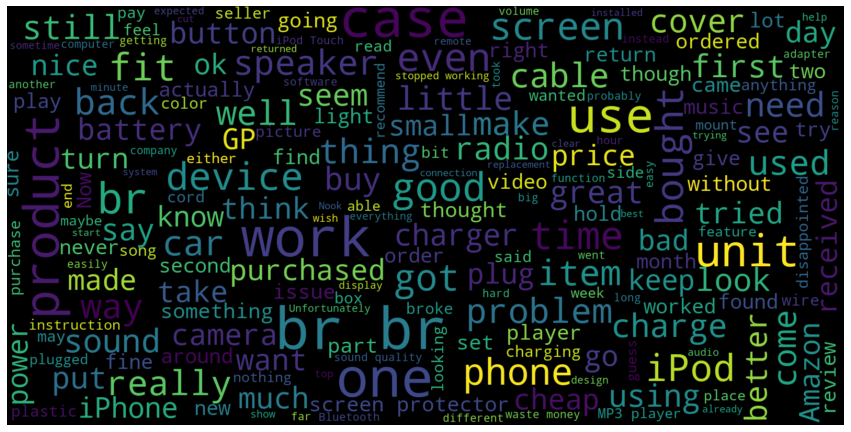

In [24]:
#To have the better picture of the importance of the words let’s create the Wordcloud of 
#all the words with sentiment = 0 i.e. negative
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==0].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()



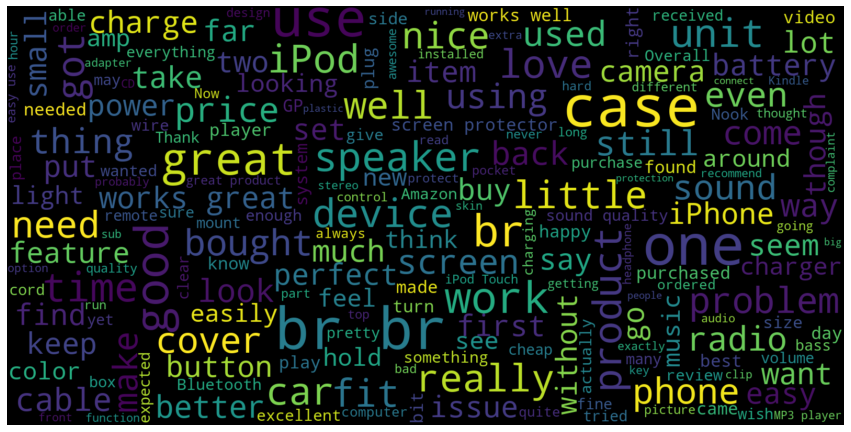

In [25]:
#same for positive words with sentiment =1
consolidated=' '.join(word for word in data['Review'][data['Sentiment']==1].astype(str))
wordCloud=WordCloud(width=1600,height=800,random_state=21,max_font_size=110)
plt.figure(figsize=(15,10))
plt.imshow(wordCloud.generate(consolidated),interpolation='bilinear')
plt.axis('off')
plt.show()



In [28]:
#TF-IDF calculates that how relevant a word in a series or corpus is to a text. The meaning increases proportionally 
#to the number of times in the text a word appears but is compensated by the word frequency in the corpus (data-set)
# We will be implementing this with the code below.
cv = TfidfVectorizer(max_features=2500)
X = cv.fit_transform(data['Review'] ).toarray()



In [30]:
#Once analysis and vectorization is done. We can now explore any machine learning model to train the data. 
#But before that perform the train-test split.
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(X,data['Sentiment'],
                                                test_size=0.25 ,
                                                random_state=42)



In [33]:
#Now we can train any model, Let’s explore the Logistic Regression.
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()

#Model fitting
model.fit(x_train,y_train)

#testing the model
pred=model.predict(x_test)

#model accuracy
print(accuracy_score(y_test,pred))



0.81632


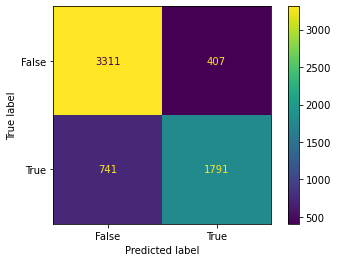

In [36]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,
                                  display_labels = [False, True])

cm_display.plot()
plt.show()

